1.  Dataset Loaded Successfully

In [4]:
import pandas as pd
import numpy as np

# Define column names based on UCI documentation
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

# Load the dataset
df = pd.read_csv(r"C:\Users\hp\Desktop\projects\heart_disease_modeling_project\data\processed.cleveland.data", names=columns)

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert 'ca' and 'thal' to numeric
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

# Show first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2. EDA and Preprocessing

In [5]:
# Basic info about the dataset
print("Dataset Info:")
df.info()

# Summary statistics
print("\nStatistical Summary:")
display(df.describe())

# Missing values count
print("\nMissing Values:")
print(df.isnull().sum())

# Fill missing values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Convert target column to binary: 0 = no disease, 1–4 = disease
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

# Show updated dataset info
print("\nPost-Preprocessing Info:")
df.info()

# Confirm no missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())

# Preview final cleaned dataset
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Post-Preprocessing Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Normalizing the data


In [6]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('num', axis=1)  # Features
y = df['num']               # Target

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame for easier use later
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Optional: If you want to re-attach the target column
df_scaled = X_scaled.copy()
df_scaled['num'] = y

# Preview the normalized data
df_scaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.711131,0.660004,0
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.504881,-0.890238,1
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.432877,1.176752,1
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.711131,-0.890238,0
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.711131,-0.890238,0


3.1 Heart Disease Prediction

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Step 1: Features and target
X = df_scaled.drop('num', axis=1)
y = df_scaled['num']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train models
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [8]:
# Step 4: Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy :", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall   :", round(recall_score(y_true, y_pred), 4))
    print("F1 Score :", round(f1_score(y_true, y_pred), 4))

    cm = confusion_matrix(y_true, y_pred)
    print("\nConfusion Matrix:")
    print(f"[[TN: {cm[0][0]}  FP: {cm[0][1]}]\n [FN: {cm[1][0]}  TP: {cm[1][1]}]]")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Step 5: Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")


--- Logistic Regression ---
Accuracy : 0.8852
Precision: 0.8788
Recall   : 0.9062
F1 Score : 0.8923

Confusion Matrix:
[[TN: 25  FP: 4]
 [FN: 3  TP: 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [9]:
# Manually re-evaluate Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("\n--- Random Forest Classifier ---")
print("Accuracy :", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall   :", round(recall_score(y_test, y_pred_rf), 4))
print("F1 Score :", round(f1_score(y_test, y_pred_rf), 4))

cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(f"[[TN: {cm[0][0]}  FP: {cm[0][1]}]\n [FN: {cm[1][0]}  TP: {cm[1][1]}]]")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))



--- Random Forest Classifier ---
Accuracy : 0.8689
Precision: 0.9
Recall   : 0.8438
F1 Score : 0.871

Confusion Matrix:
[[TN: 26  FP: 3]
 [FN: 5  TP: 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



3.2 Cholestrol Level Prediction

Mean Squared Error: 1.3121284945811622
R² Score: 0.13367645041041698


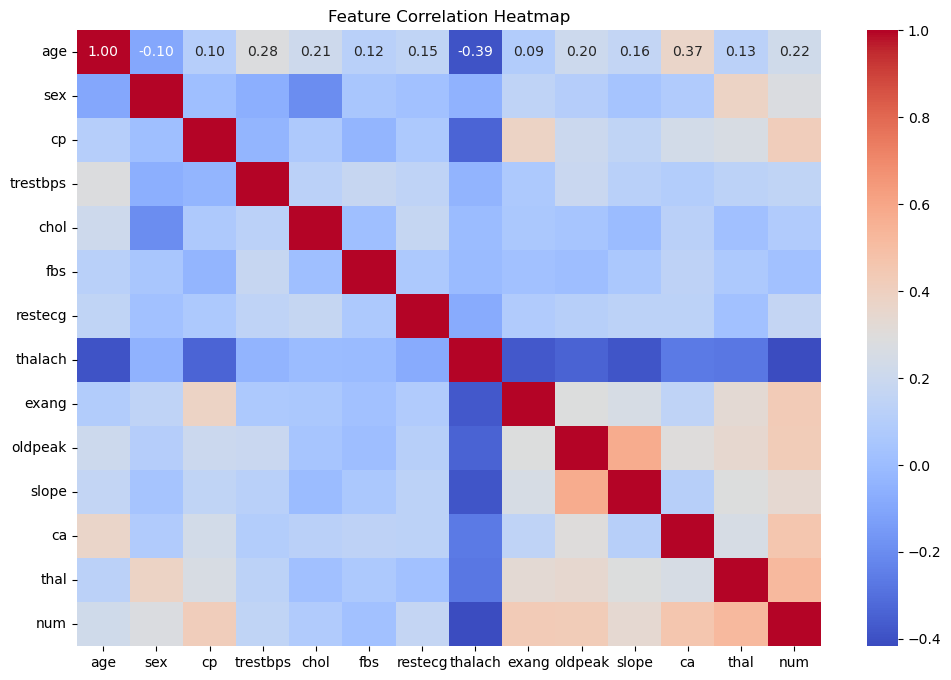


Top features correlated with 'chol':
age         0.208950
restecg     0.171043
trestbps    0.130120
ca          0.123726
num         0.085164
cp          0.072319
exang       0.061310
oldpeak     0.046564
thal        0.018351
fbs         0.009841
thalach    -0.003432
slope      -0.004062
sex        -0.199915
Name: chol, dtype: float64


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Separate target and features
X = df_scaled.drop(columns=['chol', 'num'])  # drop 'chol' (target) and 'num' (classification target)
y = df_scaled['chol']  # predict serum cholesterol

# 2. Normalize features (already done in df_scaled, but reconfirm if needed)
# You can skip if df_scaled is already standardized, otherwise:
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# 5. Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 6. Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 7. Show top correlations with cholesterol
print("\nTop features correlated with 'chol':")
print(corr_matrix['chol'].drop('chol').sort_values(ascending=False))
